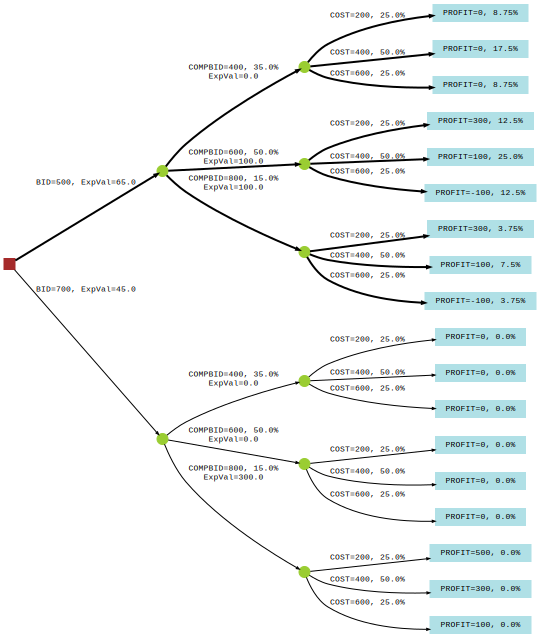

In [1]:
from nodes import Nodes
from decisiontree import DecisionTree

nodes = Nodes()

nodes.decision(
    name="BID",
    branches=[
        (500, "COMPBID"),
        (700, "COMPBID"),
    ],
    max_=True,
)

nodes.chance(
    name='COMPBID',
    branches=[
        (35.0,  400,  "COST"),
        (50.0,  600,  "COST"),
        (15.0,  800,  "COST")
    ]
)

nodes.chance(
    name='COST',
    branches=[
       (25.0,  200,  "PROFIT"),
       (50.0,  400,  "PROFIT"),
       (25.0,  600,  "PROFIT"),
    ]
)

def profit(BID, COST, COMPBID):
    return (BID - COST) * (1 if BID < COMPBID else 0)

nodes.terminal(
    name="PROFIT",
    user_fn=profit,
)

tree = DecisionTree(
    variables=nodes,
    initial_variable="BID"
)

tree.build()
tree.evaluate()
tree.plot()

